# FIFA 20 análisis y visualización

<img src='https://160over90.com/assets/images/CaseStudies/EA_FIFA.jpg'>

FIFA 20 es un videojuego de simulación de fútbol desarrollado por EA Sports, como parte de la serie FIFA de Electronic Arts

# Procesamiento

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

In [2]:
%time df = pd.read_csv('fifa-20-complete-player-dataset/players_20.csv')
print(df.shape)

CPU times: user 698 ms, sys: 31.3 ms, total: 729 ms
Wall time: 833 ms
(18278, 104)


In [3]:
# Cabecera de los datos
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...    lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...   68+2  66+2   
1        187         83    Portugal             Juventus  ...   65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...   66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...    NaN   NaN   
4        175         74     Belgium          Real Madrid  ...   66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [177]:
# Tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 98 columns):
short_name                    0 non-null object
age                           0 non-null int64
dob                           0 non-null object
height_cm                     0 non-null int64
weight_kg                     0 non-null int64
nationality                   0 non-null object
club                          0 non-null object
overall                       0 non-null int64
potential                     0 non-null int64
value_eur                     0 non-null int64
wage_eur                      0 non-null int64
player_positions              0 non-null object
preferred_foot                0 non-null object
international_reputation      0 non-null int64
weak_foot                     0 non-null int64
skill_moves                   0 non-null int64
work_rate                     0 non-null object
body_type                     0 non-null object
release_clause_eur            0 non-null float64
play

In [4]:
# Busqueda de valores nulos
df.isnull().sum()

sofifa_id                       0
player_url                      0
short_name                      0
long_name                       0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
release_clause_eur           1298
player_tags                 16779
team_position                 240
team_jersey_number            240
loaned_from                 17230
joined                       1288
contract_valid_until          240
nation_positio

In [5]:
# Estadistica descriptiva

df.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot          ...           mentality_penalties  \
count  18278.000000          ...                  18278.000000   
mean       2.944250          ...                     48.383357   
std        0.664656          ...                     15.708099   
min        1.000000          ...                      7.000000   
25%        3.000000          ...                     39.000000   
50%        3.000000          ...                     49.000000   
75%        3.000000          ...                     60.000000   
max        5.000000          ...                     92.000000   

       mentality_composure  defending_marking  defending_standing_tackle  \
count         18278.000000       18278.000000               18278.000000   
mean             58.528778          46.848889                  47.640333   
std              11.880840          20.091287                  21.585641   
min              12.000000           1.000000                   5.000000   
25%              51.000000          29.000000                  27.000000   
50%              60.000000          52.000000                  55.000000   
75%              67.000000          64.000000                  66.000000   
max              96.000000          94.000000                  92.000000   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
count              18278.000000        18278.000000          18278.000000   
mean                  45.606631           16.572765             16.354853   
std                   21.217734           17.738069             16.996925   
min                    3.000000            1.000000              1.000000   
25%                   24.000000            8.000000              8.000000   
50%                   52.000000           11.000000             11.000000   
75%                   64.000000           14.000000             14.000000   
max                   90.000000           90.000000             92.000000   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  
count         18278.000000             18278.000000          18278.000000  
mean             16.212934                16.368038             16.709924  
std              16.613665                17.136497             18.038125  
min               1.000000                 1.000000              1.000000  
25%               8.000000                 8.000000              8.000000  
50%              11.000000                11.000000             11.000000  
75%              14.000000                14.000000             14.000000  
max  

In [6]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [7]:
df.drop(['sofifa_id','player_url','real_face','nation_position','nation_jersey_number','long_name'],axis=1,inplace=True)

In [8]:
df.head(10)

short_name  age         dob  height_cm  weight_kg  nationality  \
0           L. Messi   32  1987-06-24        170         72    Argentina   
1  Cristiano Ronaldo   34  1985-02-05        187         83     Portugal   
2          Neymar Jr   27  1992-02-05        175         68       Brazil   
3           J. Oblak   26  1993-01-07        188         87     Slovenia   
4          E. Hazard   28  1991-01-07        175         74      Belgium   
5       K. De Bruyne   28  1991-06-28        181         70      Belgium   
6      M. ter Stegen   27  1992-04-30        187         85      Germany   
7        V. van Dijk   27  1991-07-08        193         92  Netherlands   
8          L. Modrić   33  1985-09-09        172         66      Croatia   
9           M. Salah   27  1992-06-15        175         71        Egypt   

                  club  overall  potential  value_eur  ...    lwb   ldm   cdm  \
0         FC Barcelona       94         94   95500000  ...   68+2  66+2  66+2   
1             Juventus       93         93   58500000  ...   65+3  61+3  61+3   
2  Paris Saint-Germain       92         92  105500000  ...   66+3  61+3  61+3   
3      Atlético Madrid       91         93   77500000  ...    NaN   NaN   NaN   
4          Real Madrid       91         91   90000000  ...   66+3  63+3  63+3   
5      Manchester City       91         91   90000000  ...   77+3  77+3  77+3   
6         FC Barcelona       90         93   67500000  ...    NaN   NaN   NaN   
7            Liverpool       90         91   78000000  ...   79+3  83+3  83+3   
8          Real Madrid       90         90   45000000  ...   81+3  81+3  81+3   
9            Liverpool       90         90   80500000  ...   70+3  67+3  67+3   

    rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  66+3  61+3  49+3  49+3  49+3  61+3  
5  77+3  77+3  73+3  66+3  66+3  66+3  73+3  
6   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
7  83+3  79+3  81+3  87+3  87+3  87+3  81+3  
8  81+3  81+3  79+3  72+3  72+3  72+3  79+3  
9  67+3  70+3  66+3  57+3  57+3  57+3  66+3  

[10 rows x 98 columns]

In [9]:
df.columns

Index(['short_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality',
       'club', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power',

In [10]:
# Función para seleccionar club
def club(x):
    return df[df['club']==x][['short_name', 'team_jersey_number','player_positions','overall','potential','nationality','age','value_eur','wage_eur','contract_valid_until']]

# TOP 5 CLUBES

 # Real Madrid
 
 ![Real Madrid Logo](https://2.bp.blogspot.com/-AllxpG7Uqzw/WqQ23VDAtMI/AAAAAAABQ7Q/XivHI-7copgiiRbLjuKJ9meOzDA9fY6HQCLcBGAs/s1600/Real%2BMadrid%2BCF.png)

In [11]:
realmadrid = club('Real Madrid')
realmadrid = realmadrid.astype({'team_jersey_number':int, 'contract_valid_until':int})

In [12]:
realmadrid.head(10)

short_name  team_jersey_number player_positions  overall  potential  \
4      E. Hazard                   7           LW, CF       91         91   
8      L. Modrić                  10               CM       90         90   
18  Sergio Ramos                   4               CB       89         89   
28   T. Courtois                  13               GK       88         89   
36      T. Kroos                   8               CM       88         88   
42      Casemiro                  14              CDM       87         89   
46    K. Benzema                   9           CF, ST       87         87   
53      K. Navas                   1               GK       87         87   
62          Isco                  22      CAM, CM, LW       86         87   
76     R. Varane                   5               CB       85         90   

   nationality  age  value_eur  wage_eur  contract_valid_until  
4      Belgium   28   90000000    470000                  2024  
8      Croatia   33   45000000    340000                  2020  
18       Spain   33   31500000    300000                  2020  
28     Belgium   27   48000000    235000                  2024  
36     Germany   29   57000000    330000                  2023  
42      Brazil   27   53500000    240000                  2021  
46      France   31   45000000    285000                  2021  
53  Costa Rica   32   30500000    195000                  2020  
62       Spain   27   51000000    245000                  2022  
76      France   26   45000000    205000                  2022

In [32]:
r, c = realmadrid.shape
print('Cantidad de jugadores actuales ', r)

Cantidad de jugadores actuales  33


In [14]:
realmadridsquadvalue = 0
for i in range(0, len(realmadrid)):
    realmadridsquadvalue+=realmadrid.iloc[i]['value_eur']
    
realmadridsquadvalue = realmadridsquadvalue/1000000

print('Valor actual del Real Madrid: ',realmadridsquadvalue, ' millones de Euros')

Valor actual del Real Madrid:  897.85  millones de Euros


In [15]:
realmadridsquadwage = 0
for i in range(0, len(realmadrid)):
    realmadridsquadwage+=realmadrid.iloc[i]['wage_eur']
    
realmadridsquadwage = realmadridsquadwage/1000000

print('Real Madrid gasta ',realmadridsquadwage,' millones de Euros  por semana como salario para sus jugadores')

Real Madrid gasta  5.354  millones de Euros  por semana como salario para sus jugadores


In [16]:
avg_age = realmadrid["age"].mean()
avg_age = round(avg_age,1)
print('Real Madrid tiene una edad media de ',avg_age, ' años')

Real Madrid tiene una edad media de  24.9  años


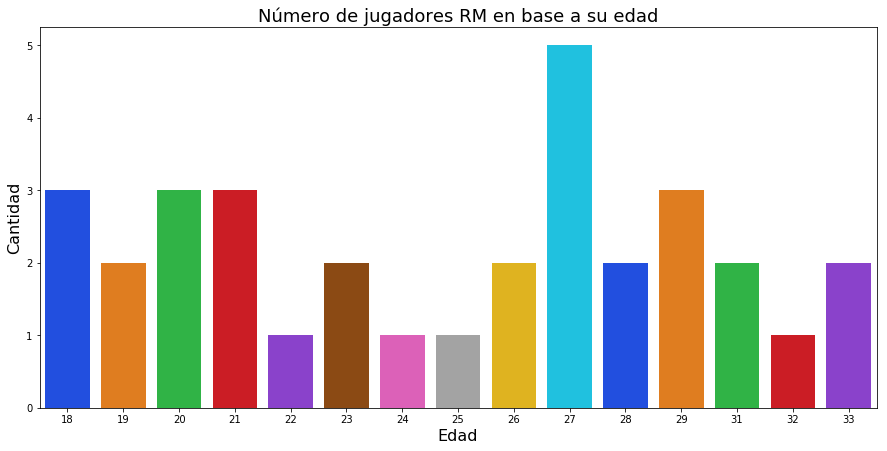

In [17]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='age', data=realmadrid, palette='bright')
ax.set_title(label='Número de jugadores RM en base a su edad', fontsize=18)

ax.set_xlabel(xlabel='Edad', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)

plt.show()

In [18]:
avg_ovr = realmadrid["overall"].mean()
avg_ovr = int(avg_ovr)
print('Real Madrid tiene un promedio en general de ',avg_ovr)

Real Madrid tiene un promedio en general de  80


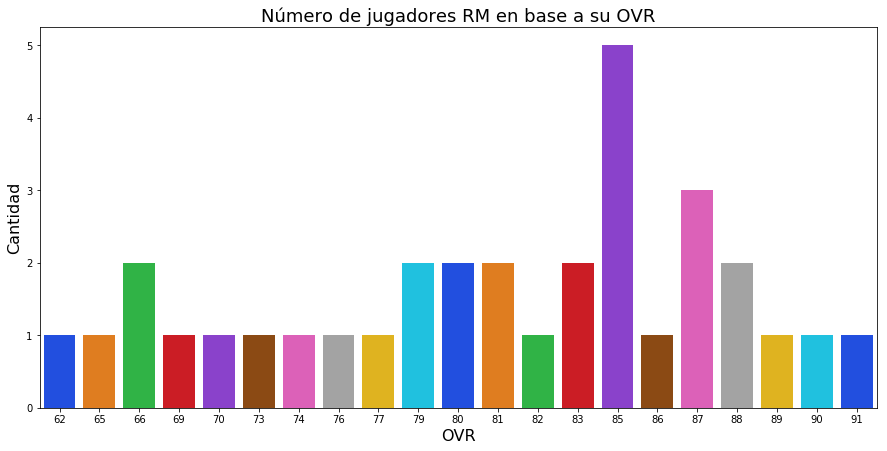

In [19]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=realmadrid, palette='bright')
ax.set_title(label='Número de jugadores RM en base a su OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)

plt.show()

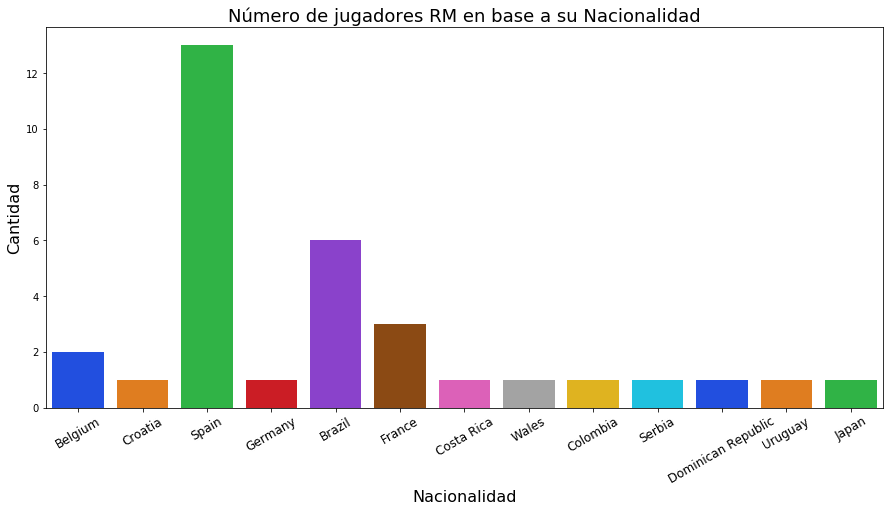

In [20]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='nationality', data=realmadrid, palette='bright')
ax.set_title(label='Número de jugadores RM en base a su Nacionalidad', fontsize=18)

ax.set_xlabel(xlabel='Nacionalidad', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

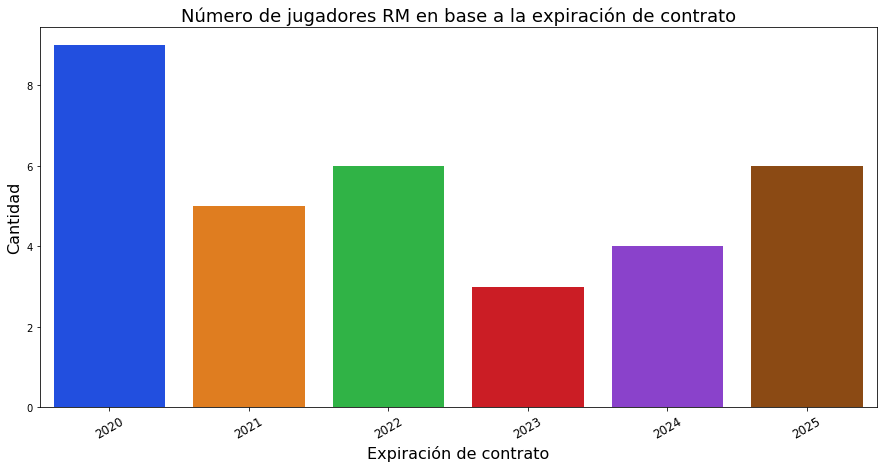

In [21]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='contract_valid_until', data=realmadrid, palette='bright')
ax.set_title(label='Número de jugadores RM en base a la expiración de contrato', fontsize=18)

ax.set_xlabel(xlabel='Expiración de contrato', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

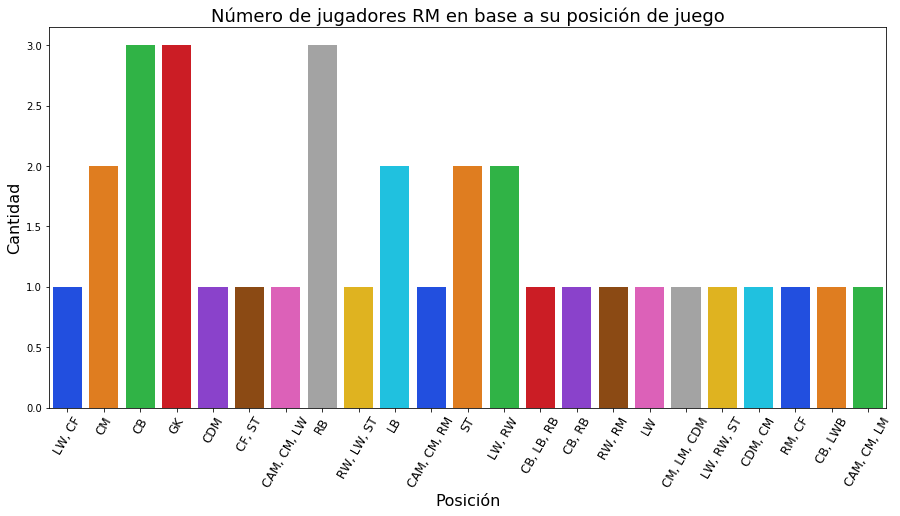

In [22]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='player_positions', data=realmadrid, palette='bright')
ax.set_title(label='Número de jugadores RM en base a su posición de juego', fontsize=18)

ax.set_xlabel(xlabel='Posición', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)
plt.xticks(rotation=60, fontsize=12)

plt.show()

In [23]:
tempdf = realmadrid.sort_values(by='overall')
fig = px.bar(tempdf, x='short_name', y='overall', color='overall')

fig['layout']['yaxis1'].update(title='', range=[60, 100], dtick=5, autorange=False)

fig.update_layout(title='OVR jugadores Real Madrid',
                 xaxis_title="Nombre",
                 yaxis_title="OVR")

py.iplot(fig)

In [24]:
tempdf = realmadrid.sort_values(by='potential')
fig = px.bar(tempdf, x='short_name', y='potential', color='potential')

fig['layout']['yaxis1'].update(title='', range=[60, 100], dtick=5, autorange=False)

fig.update_layout(title='Potencial jugadores Real Madrid',
                 xaxis_title="Nombre",
                 yaxis_title=" Potencial")

py.iplot(fig)

In [25]:
tempdf = realmadrid.sort_values(by='wage_eur')
fig = px.bar(tempdf, x='short_name', y='wage_eur', color='wage_eur')

fig.update_layout(title='Salario semanal jugadores Real Madrid',
                 xaxis_title="Nombre",
                 yaxis_title="Salario en Euros")

py.iplot(fig)

In [52]:
tempdf = realmadrid.sort_values(by='value_eur')
fig = px.bar(tempdf, x='short_name', y='value_eur', color='value_eur')

fig.update_layout(title='Valor jugadores Real Madrid',
                 xaxis_title="Nombre",
                 yaxis_title="Valor en Euros")

py.iplot(fig)

In [27]:
tempdf = realmadrid.sort_values(by='contract_valid_until')
fig = px.bar(tempdf, x='short_name', y='contract_valid_until', color='contract_valid_until')

fig['layout']['yaxis1'].update(title='', range=[2019, 2026], dtick=5, autorange=False)


fig.update_layout(title='Expiración de contrato jugadores Real Madrid',
                 xaxis_title="Nombre",
                 yaxis_title="Expiración de contrato")

py.iplot(fig)

# Juventus
 
 ![Juventus_logo](https://2.bp.blogspot.com/-3NNyUD_tCcc/WU_FWvr_xvI/AAAAAAABJuI/P1kFMzQeDNIZU1rDP-_8Iw_19dFSMiWDwCLcBGAs/s1600/Juventus%2BFC.png)

In [28]:
juventus = club('Juventus')
juventus = juventus.astype({'team_jersey_number':int, 'contract_valid_until':int})

In [29]:
juventus.head()

short_name  team_jersey_number player_positions  overall  \
1   Cristiano Ronaldo                   7           ST, LW       93   
16       G. Chiellini                   3               CB       89   
23          P. Dybala                  10          CAM, RW       88   
60        W. Szczęsny                   1               GK       86   
65          M. Pjanić                   5          CM, CDM       86   

    potential         nationality  age  value_eur  wage_eur  \
1          93            Portugal   34   58500000    405000   
16         89               Italy   34   24500000    215000   
23         92           Argentina   25   76500000    215000   
60         88              Poland   29   37500000    135000   
65         86  Bosnia Herzegovina   29   42500000    180000   

    contract_valid_until  
1                   2022  
16                  2020  
23                  2022  
60                  2021  
65                  2023

In [31]:
r,c = juventus.shape
print('Cantidad de jugadores actuales ', r)

Cantidad de jugadores actuales  33  jugadores


In [33]:
juventussquadvalue = 0
for i in range(0, len(juventus)):
    juventussquadvalue+=juventus.iloc[i]['value_eur']
    
juventussquadvalue = juventussquadvalue/1000000

print('Valor actual de Juventus ',juventussquadvalue, ' millones de Euros')

Valor actual de JUventus  735.475  millones de Euros


In [34]:
juventussquadwage = 0
for i in range(0, len(juventus)):
    juventussquadwage+=juventus.iloc[i]['wage_eur']
    
juventussquadwage = juventussquadwage/1000000

print('Juventus gasta ',juventussquadwage,' millones de Euros  por semana como salario para sus jugadores')

Juventus gasta  3.75  millones de Euros  por semana como salario para sus jugadores


In [35]:
avg_age = juventus["age"].mean()
avg_age = round(avg_age,1)
print('Juventus tiene una edad media de ',avg_age, ' años')

Juventus tiene una edad media de  27.0  años


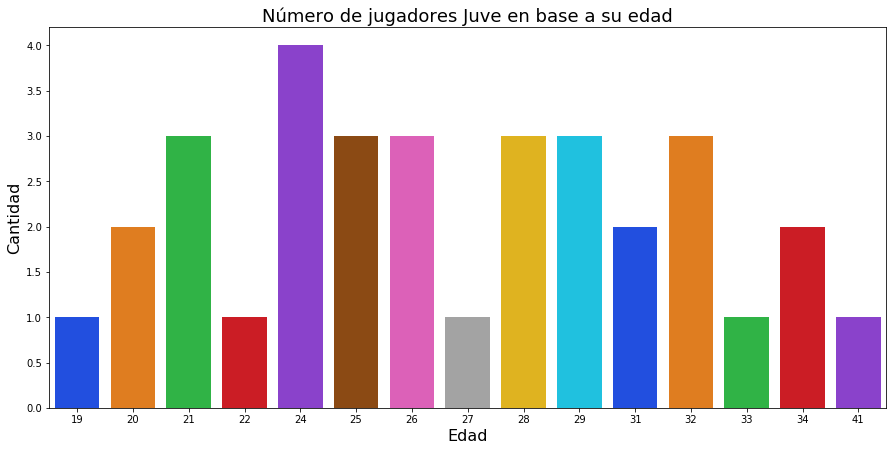

In [36]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='age', data=juventus, palette='bright')
ax.set_title(label='Número de jugadores Juve en base a su edad', fontsize=18)

ax.set_xlabel(xlabel='Edad', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)

plt.show()

In [37]:
avg_ovr = juventus["overall"].mean()
avg_ovr = int(avg_ovr)
print('Juventus tiene un promedio en general de ',avg_ovr)

Juventus tiene un promedio en general de  80


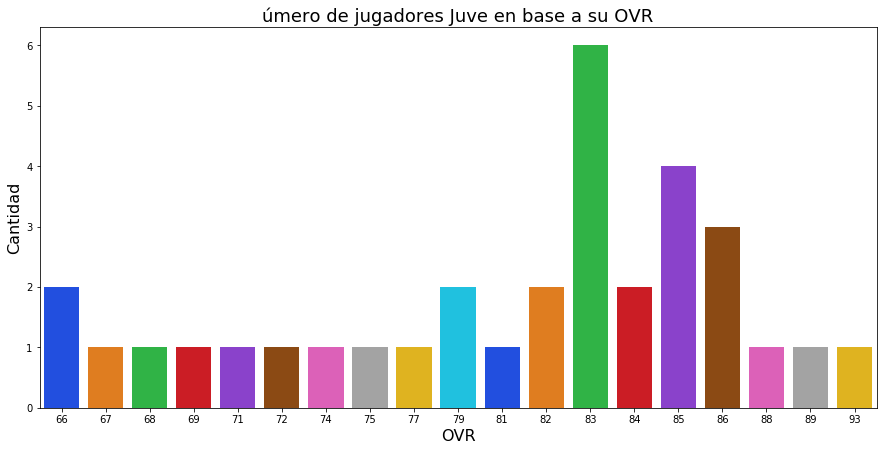

In [38]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=juventus, palette='bright')
ax.set_title(label='úmero de jugadores Juve en base a su OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)

plt.show()

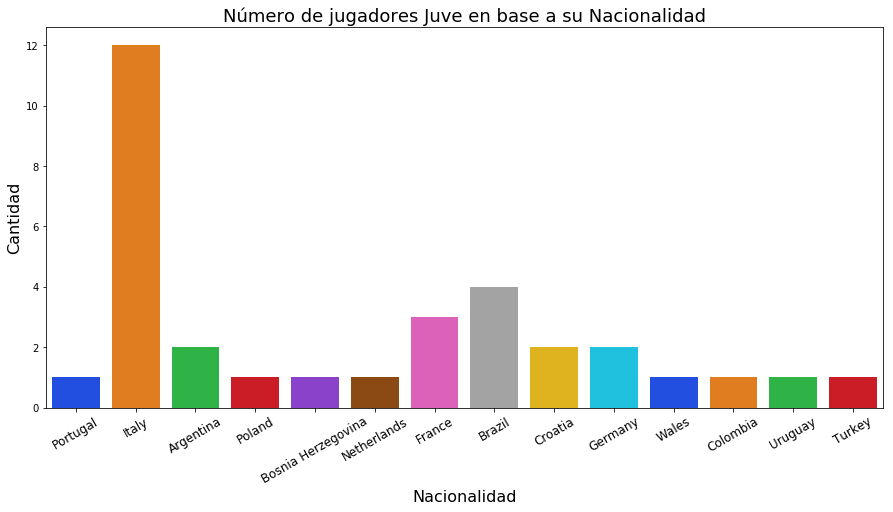

In [39]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='nationality', data=juventus, palette='bright')
ax.set_title(label='Número de jugadores Juve en base a su Nacionalidad', fontsize=18)

ax.set_xlabel(xlabel='Nacionalidad', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

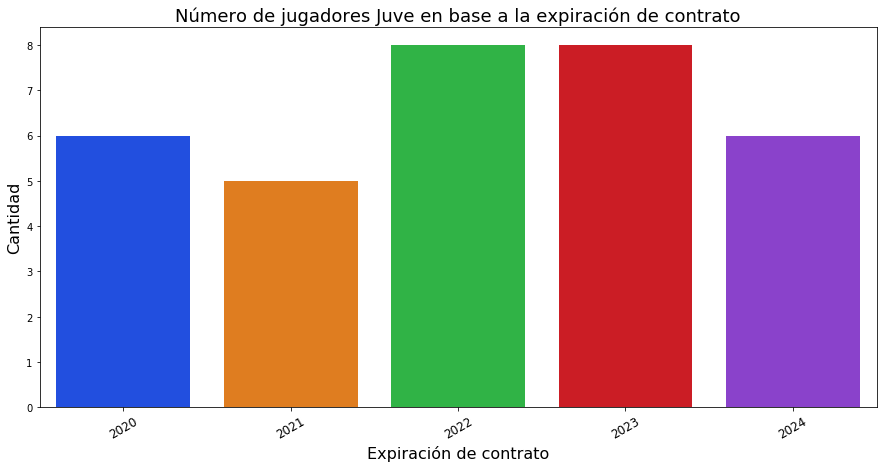

In [40]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='contract_valid_until', data=juventus, palette='bright')
ax.set_title(label='Número de jugadores Juve en base a la expiración de contrato', fontsize=18)

ax.set_xlabel(xlabel='Expiración de contrato', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

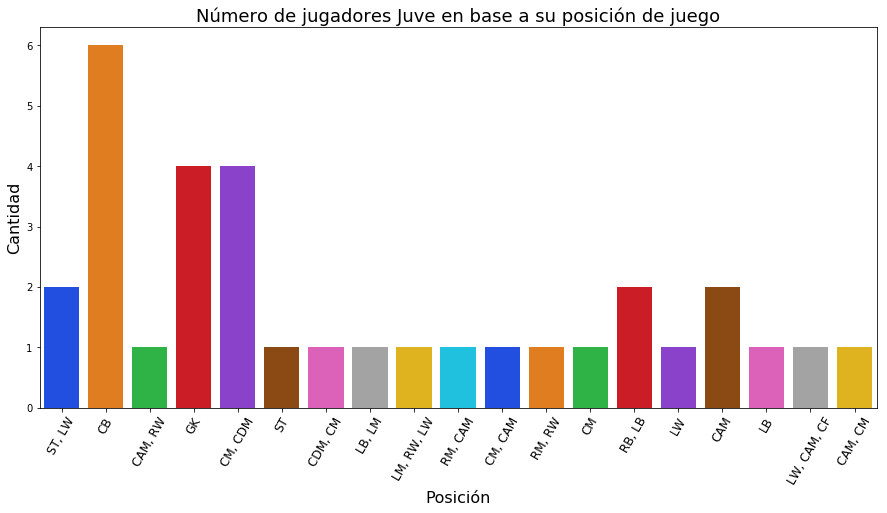

In [42]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='player_positions', data=juventus, palette='bright')
ax.set_title(label='Número de jugadores Juve en base a su posición de juego', fontsize=18)

ax.set_xlabel(xlabel='Posición', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)
plt.xticks(rotation=60, fontsize=12)

plt.show()

In [43]:
tempdf = juventus.sort_values(by='overall')
fig = px.bar(tempdf, x='short_name', y='overall', color='overall')

fig['layout']['yaxis1'].update(title='', range=[60, 100], dtick=5, autorange=False)

fig.update_layout(title='OVR jugadores Juventus',
                 xaxis_title="Nombre",
                 yaxis_title="OVR")

py.iplot(fig)

In [48]:
tempdf = juventus.sort_values(by='potential')
fig = px.bar(tempdf, x='short_name', y='potential', color='potential')

fig['layout']['yaxis1'].update(title='', range=[60, 100], dtick=5, autorange=False)

fig.update_layout(title='Potencial jugadores Juventus',
                 xaxis_title="Nombre",
                 yaxis_title=" Potencial")

py.iplot(fig)

In [49]:
tempdf = juventus.sort_values(by='wage_eur')
fig = px.bar(tempdf, x='short_name', y='wage_eur', color='wage_eur')

fig.update_layout(title='Salario semanal jugadores Juventus',
                 xaxis_title="Nombre",
                 yaxis_title="Salario en Euros")

py.iplot(fig)

In [51]:
tempdf = juventus.sort_values(by='value_eur')
fig = px.bar(tempdf, x='short_name', y='value_eur', color='value_eur')

fig.update_layout(title='Valor jugadores Juventus',
                 xaxis_title="Nombre",
                 yaxis_title="Valor en Euros")

py.iplot(fig)

In [53]:
tempdf = juventus.sort_values(by='contract_valid_until')
fig = px.bar(tempdf, x='short_name', y='contract_valid_until', color='contract_valid_until')

fig['layout']['yaxis1'].update(title='', range=[2019, 2026], dtick=5, autorange=False)


fig.update_layout(title='Expiración de contrato jugadores Juventus',
                 xaxis_title="Nombre",
                 yaxis_title="Expiración de contrato")

py.iplot(fig)

# Barcelona
 
 ![Barcelona_logo](https://3.bp.blogspot.com/-pZVJsdzHE4w/WVQLfYB0MvI/AAAAAAABKO0/v_g425KvIK4NlLuFDX8TPbyAc66VA8iDACLcBGAs/s1600/FC%2BBarcelona.png)

In [54]:
barcelona = club('FC Barcelona')
barcelona = barcelona.astype({'team_jersey_number':int, 'contract_valid_until':int})

In [55]:
barcelona.head()

short_name  team_jersey_number player_positions  overall  potential  \
0          L. Messi                  10       RW, CF, ST       94         94   
6     M. ter Stegen                   1               GK       90         93   
19        L. Suárez                   9               ST       89         89   
21  Sergio Busquets                   5          CDM, CM       89         89   
22     A. Griezmann                  17       CF, ST, LW       89         89   

   nationality  age  value_eur  wage_eur  contract_valid_until  
0    Argentina   32   95500000    565000                  2021  
6      Germany   27   67500000    250000                  2022  
19     Uruguay   32   53000000    355000                  2021  
21       Spain   30   55000000    300000                  2023  
22      France   28   69000000    370000                  2024

In [56]:
r,c = barcelona.shape
print('Cantidad de jugadores actuales ', r)

Cantidad de jugadores actuales  33


In [59]:
barcelonasquadvalue = 0
for i in range(0, len(barcelona)):
    barcelonasquadvalue+=barcelona.iloc[i]['value_eur']
    
barcelonasquadvalue = barcelonasquadvalue/1000000

print('Valor actual del Barcelona: ',barcelonasquadvalue, ' millones de Euros')

Valor actual del Barcelona:  869.3  millones de Euros


In [60]:
barcelonasquadwage = 0
for i in range(0, len(barcelona)):
    barcelonasquadwage+=barcelona.iloc[i]['wage_eur']
    
barcelonasquadwage = barcelonasquadwage/1000000

print('Barcelona gasta ',barcelonasquadwage,' millones de Euros  por semana como salario para sus jugadores')

Barcelona gasta  4.95  millones de Euros  por semana como salario para sus jugadores


In [61]:
avg_age = barcelona["age"].mean()
avg_age = round(avg_age,1)
print('FC Barcelona tiene una edad media de ',avg_age, ' años')

FC Barcelona tiene una edad media de  24.1  años


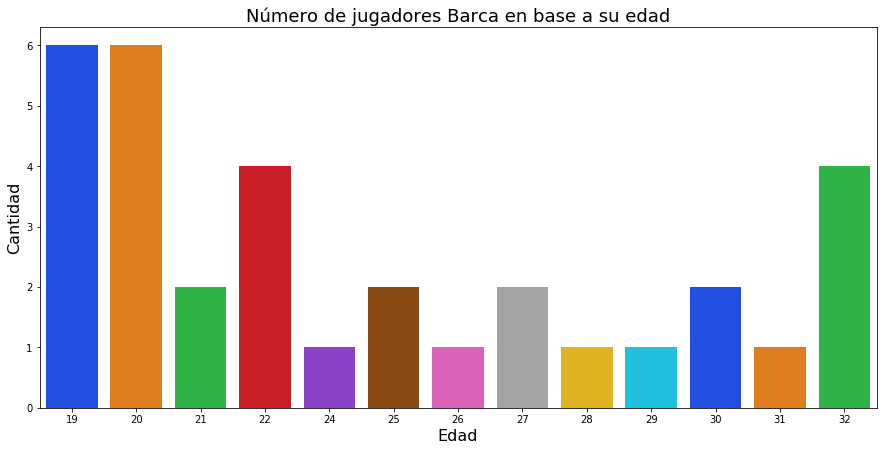

In [63]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='age', data=barcelona, palette='bright')
ax.set_title(label='Número de jugadores Barca en base a su edad', fontsize=18)

ax.set_xlabel(xlabel='Edad', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)

plt.show()

In [64]:
avg_ovr = barcelona["overall"].mean()
avg_ovr = int(avg_ovr)
print('Barca tiene un promedio en general de ',avg_ovr)

Barca tiene un promedio en general de  78


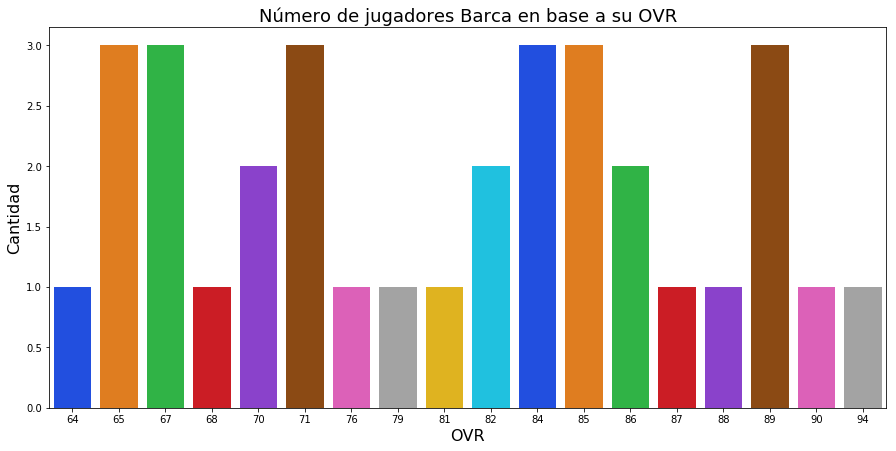

In [65]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=barcelona, palette='bright')
ax.set_title(label='Número de jugadores Barca en base a su OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)

plt.show()

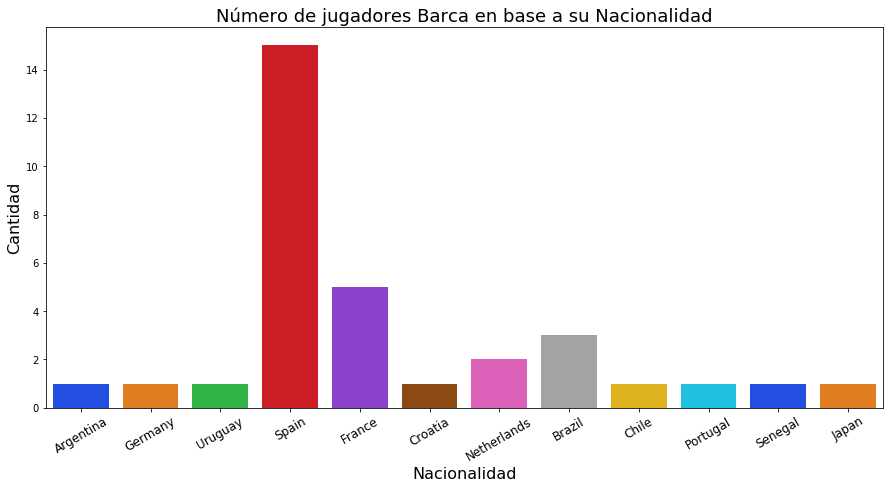

In [66]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='nationality', data=barcelona, palette='bright')
ax.set_title(label='Número de jugadores Barca en base a su Nacionalidad', fontsize=18)

ax.set_xlabel(xlabel='Nacionalidad', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

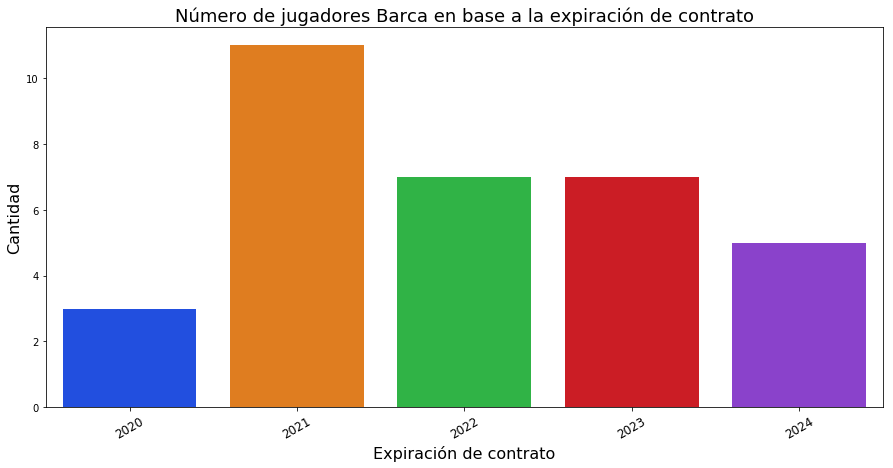

In [67]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='contract_valid_until', data=barcelona, palette='bright')
ax.set_title(label='Número de jugadores Barca en base a la expiración de contrato', fontsize=18)

ax.set_xlabel(xlabel='Expiración de contrato', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

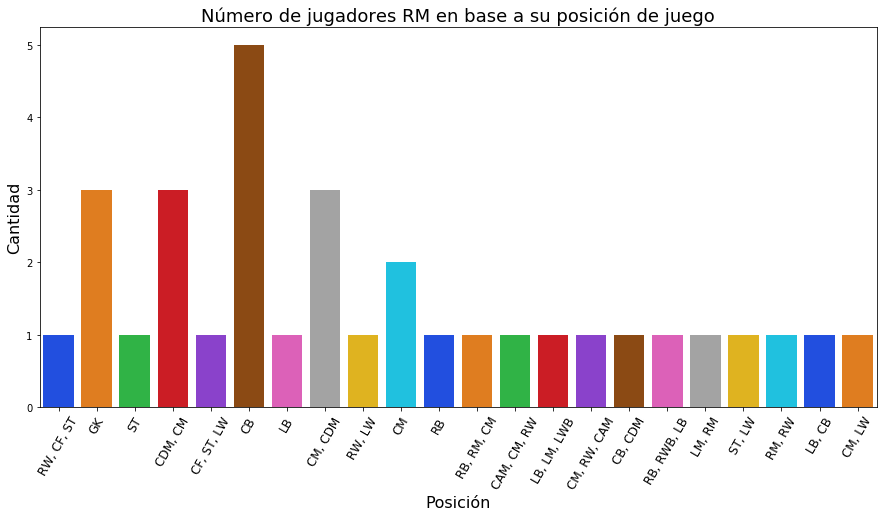

In [68]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='player_positions', data=barcelona, palette='bright')
ax.set_title(label='Número de jugadores RM en base a su posición de juego', fontsize=18)

ax.set_xlabel(xlabel='Posición', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)
plt.xticks(rotation=60, fontsize=12)

plt.show()

In [69]:
tempdf = barcelona.sort_values(by='overall')
fig = px.bar(tempdf, x='short_name', y='overall', color='overall')

fig['layout']['yaxis1'].update(title='', range=[60, 100], dtick=5, autorange=False)

fig.update_layout(title='OVR jugadores Barca',
                 xaxis_title="Nombre",
                 yaxis_title="OVR")

py.iplot(fig)

In [70]:
tempdf = barcelona.sort_values(by='potential')
fig = px.bar(tempdf, x='short_name', y='potential', color='potential')

fig['layout']['yaxis1'].update(title='', range=[60, 100], dtick=5, autorange=False)

fig.update_layout(title='Potencial jugadores Barcelona',
                 xaxis_title="Nombre",
                 yaxis_title="Potencial")

py.iplot(fig)

In [71]:
tempdf = barcelona.sort_values(by='wage_eur')
fig = px.bar(tempdf, x='short_name', y='wage_eur', color='wage_eur')

fig.update_layout(title='Salario semanal jugadores Barcelona',
                 xaxis_title="Nombre",
                 yaxis_title="Salario en Euros")

py.iplot(fig)

In [74]:
tempdf = barcelona.sort_values(by='value_eur')
fig = px.bar(tempdf, x='short_name', y='wage_eur', color='wage_eur')

fig.update_layout(title='Valor jugadores Barcelona',
                 xaxis_title="Nombre",
                 yaxis_title="Valor en Euros")

py.iplot(fig)

In [75]:
tempdf = barcelona.sort_values(by='contract_valid_until')
fig = px.bar(tempdf, x='short_name', y='contract_valid_until', color='contract_valid_until')

fig['layout']['yaxis1'].update(title='', range=[2019, 2026], dtick=5, autorange=False)


fig.update_layout(title='Expiración de contrato jugadores Barcelona',
                 xaxis_title="Nombre",
                 yaxis_title="Expiración de contrato")

py.iplot(fig)

 # PSG
  ![PSG](https://4.bp.blogspot.com/-Q1_qXmEKKQo/WVWA0wlx-EI/AAAAAAABKrQ/o_cGog1oMUQaTwi04OL0emepicb_5Dd2gCLcBGAs/s1600/Paris%2BSaint%2BGermain.png)

In [78]:
psg = club('Paris Saint-Germain')
psg = psg.astype({'team_jersey_number':int, 'contract_valid_until':int})

In [79]:
psg.head()

short_name  team_jersey_number player_positions  overall  potential  \
2      Neymar Jr                  10          LW, CAM       92         92   
10     K. Mbappé                   7           ST, RW       89         95   
34     E. Cavani                   9               ST       88         88   
45  Thiago Silva                   2               CB       87         87   
56    Marquinhos                   5          CB, CDM       86         90   

   nationality  age  value_eur  wage_eur  contract_valid_until  
2       Brazil   27  105500000    290000                  2022  
10      France   20   93500000    155000                  2022  
34     Uruguay   32   47000000    195000                  2020  
45      Brazil   34   18500000    135000                  2020  
56      Brazil   25   51500000    120000                  2022

In [81]:
r,c = psg.shape
print('Cantidad de jugadores actuales ', r)

Cantidad de jugadores actuales  33


In [83]:
psgsquadvalue = 0
for i in range(0, len(psg)):
    psgsquadvalue+=psg.iloc[i]['value_eur']
    
psgsquadvalue = psgsquadvalue/1000000

print('Valor actual del PSG ',psgsquadvalue, ' millones de Euros')

Valor actual del PSG  687.55  millones de Euros


In [84]:
psgsquadwage = 0
for i in range(0, len(psg)):
    psgsquadwage+=psg.iloc[i]['wage_eur']
    
psgsquadwage = psgsquadwage/1000000

print('PSG gasta ',psgsquadwage,' millones de Euros  por semana como salario para sus jugadores')

PSG gasta  2.396  millones de Euros  por semana como salario para sus jugadores


In [85]:
avg_age = psg["age"].mean()
avg_age = round(avg_age,1)
print('PSG tiene una edad media de ',avg_age, ' años')

PSG tiene una edad media de  24.0  años


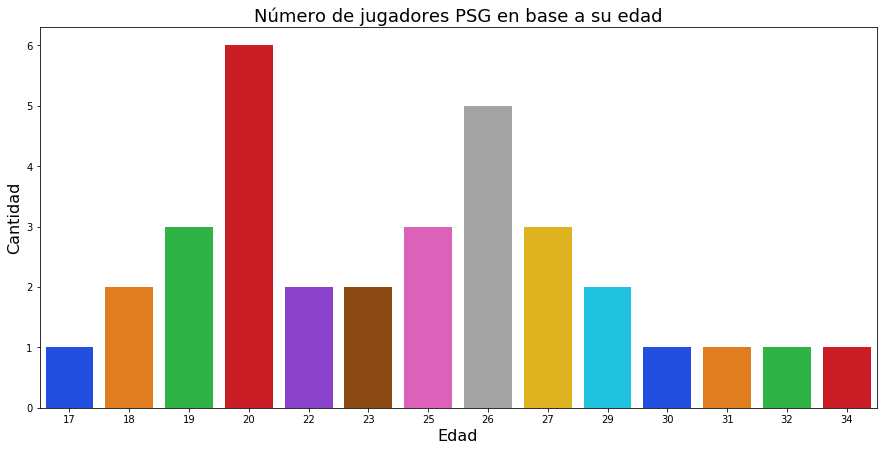

In [86]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='age', data=psg, palette='bright')
ax.set_title(label='Número de jugadores PSG en base a su edad', fontsize=18)

ax.set_xlabel(xlabel='Edad', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)

plt.show()

In [87]:
avg_ovr = psg["overall"].mean()
avg_ovr = int(avg_ovr)
print('PSG tiene un promedio en general de ',avg_ovr)

PSG tiene un promedio en general de  75


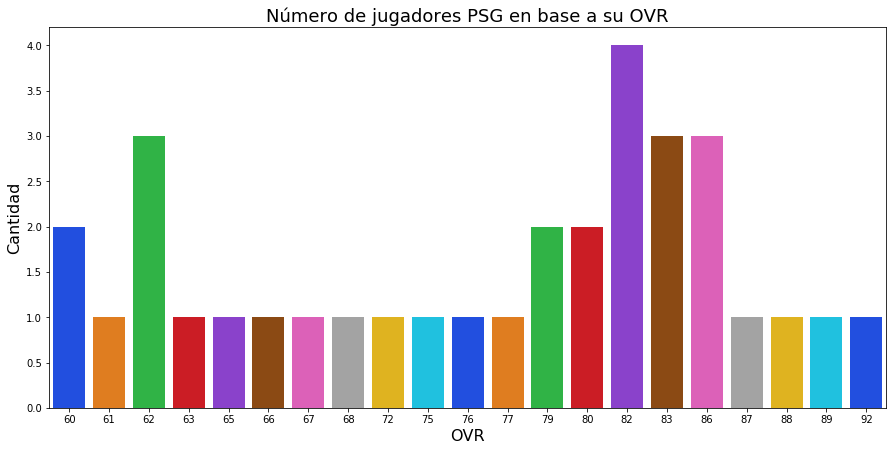

In [88]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=psg, palette='bright')
ax.set_title(label='Número de jugadores PSG en base a su OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)

plt.show()

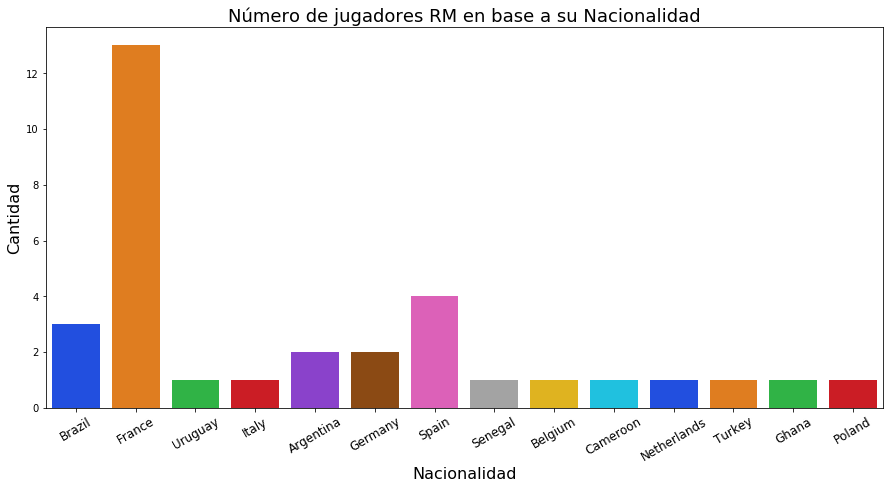

In [89]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='nationality', data=psg, palette='bright')
ax.set_title(label='Número de jugadores RM en base a su Nacionalidad', fontsize=18)

ax.set_xlabel(xlabel='Nacionalidad', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

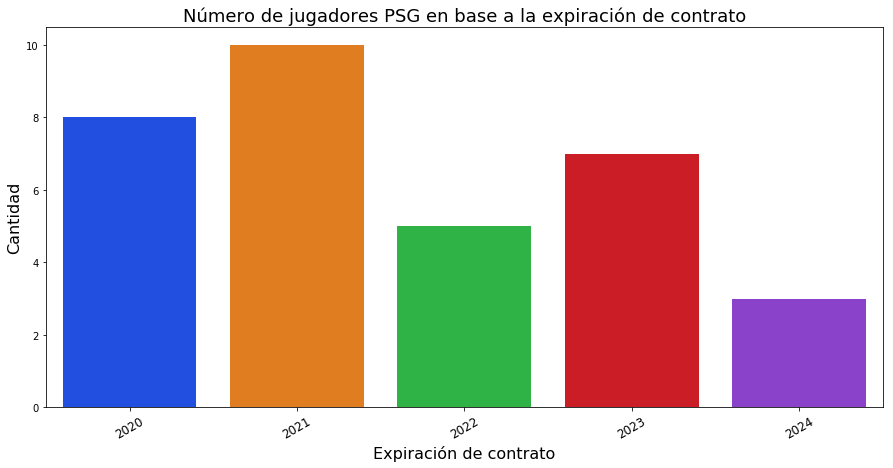

In [90]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='contract_valid_until', data=psg, palette='bright')
ax.set_title(label='Número de jugadores PSG en base a la expiración de contrato', fontsize=18)

ax.set_xlabel(xlabel='Expiración de contrato', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

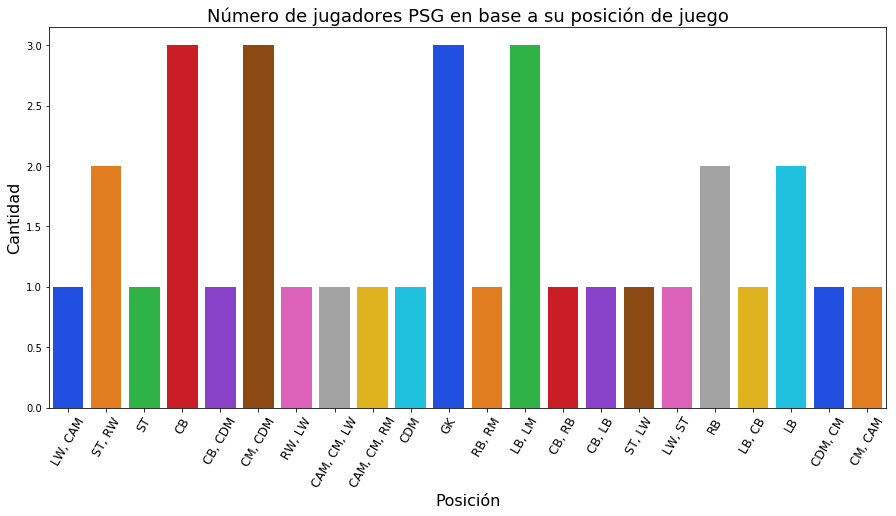

In [92]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='player_positions', data=psg, palette='bright')
ax.set_title(label='Número de jugadores PSG en base a su posición de juego', fontsize=18)

ax.set_xlabel(xlabel='Posición', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)
plt.xticks(rotation=60, fontsize=12)

plt.show()

In [93]:
tempdf = psg.sort_values(by='overall')
fig = px.bar(tempdf, x='short_name', y='overall', color='overall')

fig['layout']['yaxis1'].update(title='', range=[50, 100], dtick=5, autorange=False)

fig.update_layout(title='OVR jugadores PSG',
                 xaxis_title="Nombre",
                 yaxis_title="OVR")

py.iplot(fig)

In [94]:
tempdf = psg.sort_values(by='potential')
fig = px.bar(tempdf, x='short_name', y='potential', color='potential')

fig['layout']['yaxis1'].update(title='', range=[50, 100], dtick=5, autorange=False)

fig.update_layout(title='Potencial jugadores PSG',
                 xaxis_title="Nombre",
                 yaxis_title="Potencial")

py.iplot(fig)

In [95]:
tempdf = psg.sort_values(by='wage_eur')
fig = px.bar(tempdf, x='short_name', y='wage_eur', color='wage_eur')

fig.update_layout(title='Salario semanal jugadores PSG',
                 xaxis_title="Nombre",
                 yaxis_title="Salario en Euros")

py.iplot(fig)

In [96]:
tempdf = psg.sort_values(by='value_eur')
fig = px.bar(tempdf, x='short_name', y='wage_eur', color='wage_eur')

fig.update_layout(title='Valor jugadores PSG',
                 xaxis_title="Nombre",
                 yaxis_title="Valor en Euros")

py.iplot(fig)

In [97]:
tempdf = psg.sort_values(by='contract_valid_until')
fig = px.bar(tempdf, x='short_name', y='contract_valid_until', color='contract_valid_until')

fig['layout']['yaxis1'].update(title='', range=[2019, 2026], dtick=5, autorange=False)


fig.update_layout(title='Expiración de contrato jugadores PSG',
                 xaxis_title="Nombre",
                 yaxis_title="Expiración de contrato")

py.iplot(fig)

 # América de Cali
 
 ![America_Logo](https://3.bp.blogspot.com/-sMgU-3PvxoU/XDjJdvi00SI/AAAAAAABTts/9LD8ldol_Yw1ynA69Hu9y4uFucvbLXQOQCLcBGAs/s1600/America%2Bde%2BCali.png)

In [102]:
america = club('América de Cali')
america = america.astype({'team_jersey_number':int, 'contract_valid_until':int})

In [103]:
america.head(10)

short_name  team_jersey_number player_positions  overall  potential  \
3241     M. Pisano                   7      RW, CAM, RM       73         73   
3947     M. Rangel                   9               ST       72         72   
4278  R. Carrascal                  15          CM, CDM       71         74   
5195   H. Quiñones                   5           LB, LW       70         71   
5579    Y. Cabrera                  10          CAM, CM       70         70   
6118     P. Franco                  14          CB, CDM       69         71   
6194    E. Velasco                   3               LB       69         70   
6963          Neto                   1               GK       68         72   
7770    D. Vergara                  11           RM, LM       67         78   
8186    J. Zuluaga                  21               RB       67         70   

     nationality  age  value_eur  wage_eur  contract_valid_until  
3241   Argentina   27    4200000      3000                  2024  
3947    Colombia   28    3200000      2000                  2020  
4278    Colombia   26    2900000      2000                  2021  
5195    Colombia   27    1800000      2000                  2020  
5579    Colombia   28    1800000      2000                  2021  
6118    Colombia   28    1100000      1000                  2020  
6194    Colombia   27    1000000      1000                  2024  
6963      Brazil   26     850000      1000                  2020  
7770    Colombia   22    1300000      1000                  2022  
8186    Colombia   26     825000      1000                  2020

In [104]:
r, c = america.shape
print('Cantidad de jugadores actuales ', r)

Cantidad de jugadores actuales  28


In [109]:
americasquadvalue = 0
for i in range(0, len(america)):
    americasquadvalue+=america.iloc[i]['value_eur']
    
americasquadvalue = americasquadvalue/1000000

print('Valor actual del América de Cali: ',americasquadvalue, ' millones de Euros')

Valor actual del América de Cali:  24.7  millones de Euros


In [110]:
americasquadwage = 0
for i in range(0, len(america)):
    americasquadwage+=america.iloc[i]['wage_eur']
    
americasquadwage = americasquadwage/1000000

print('América de Cali gasta ',americasquadwage,' millones de Euros  por semana como salario para sus jugadores')

América de Caligasta  0.034  millones de Euros  por semana como salario para sus jugadores


In [112]:
avg_age = america["age"].mean()
avg_age = round(avg_age,1)
print('América de Cali tiene una edad media de ',avg_age, ' años')

América de Cali tiene una edad media de  24.2  años


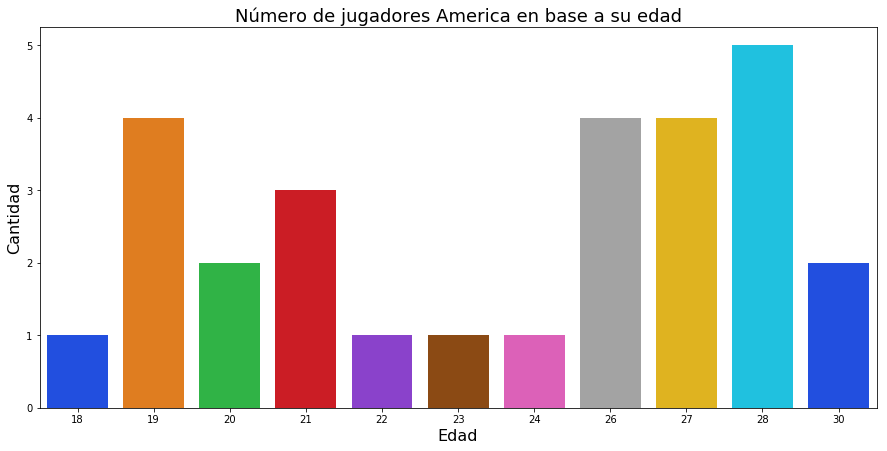

In [113]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='age', data=america, palette='bright')
ax.set_title(label='Número de jugadores America en base a su edad', fontsize=18)

ax.set_xlabel(xlabel='Edad', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)

plt.show()

In [116]:
avg_ovr = america["overall"].mean()
avg_ovr = int(avg_ovr)
print('América de Cali tiene un promedio en general de ',avg_ovr)

América de Cali tiene un promedio en general de  62


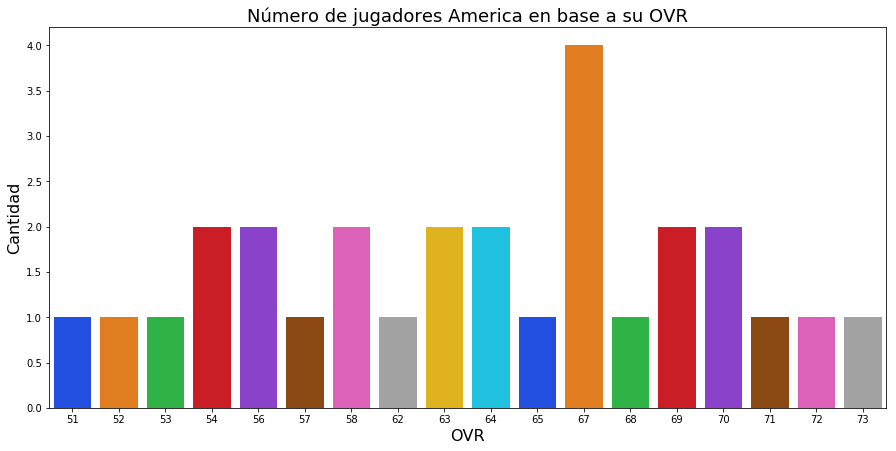

In [115]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=america, palette='bright')
ax.set_title(label='Número de jugadores America en base a su OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)

plt.show()

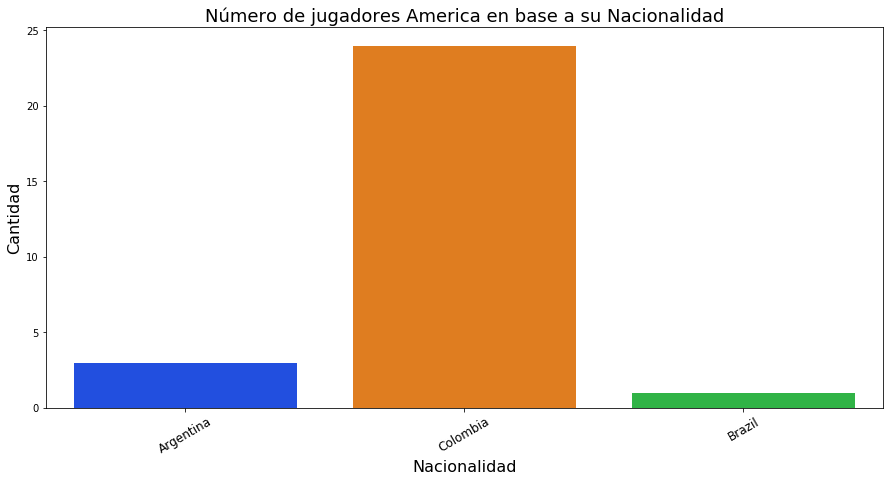

In [117]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='nationality', data=america, palette='bright')
ax.set_title(label='Número de jugadores America en base a su Nacionalidad', fontsize=18)

ax.set_xlabel(xlabel='Nacionalidad', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

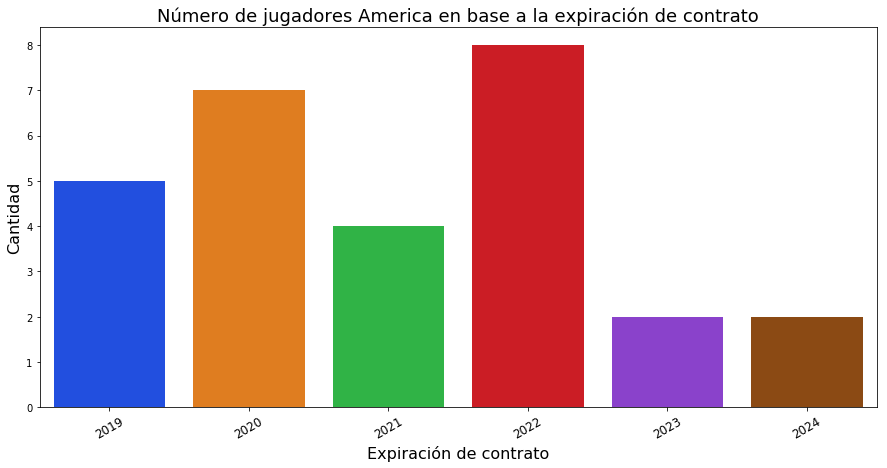

In [118]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='contract_valid_until', data=america, palette='bright')
ax.set_title(label='Número de jugadores America en base a la expiración de contrato', fontsize=18)

ax.set_xlabel(xlabel='Expiración de contrato', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

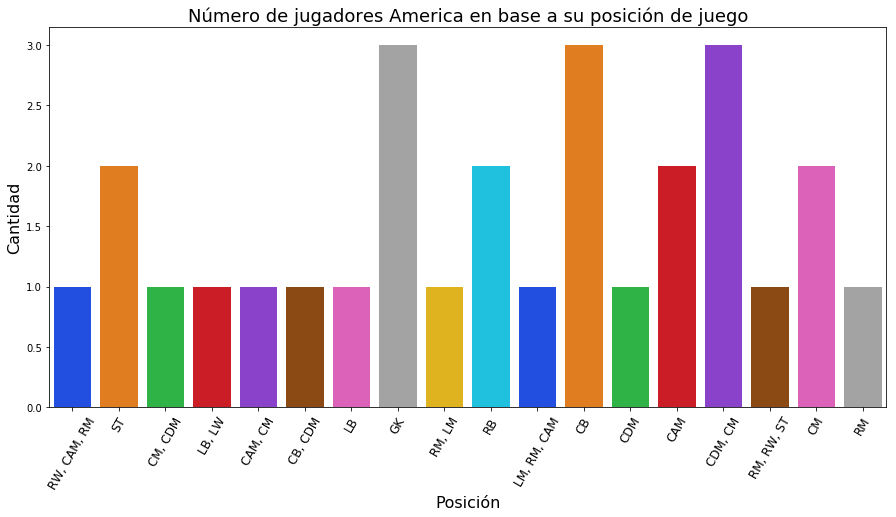

In [119]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='player_positions', data=america, palette='bright')
ax.set_title(label='Número de jugadores America en base a su posición de juego', fontsize=18)

ax.set_xlabel(xlabel='Posición', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)
plt.xticks(rotation=60, fontsize=12)

plt.show()

In [122]:
tempdf = america.sort_values(by='overall')
fig = px.bar(tempdf, x='short_name', y='overall', color='overall')

fig['layout']['yaxis1'].update(title='', range=[60, 100], dtick=5, autorange=False)

fig.update_layout(title='OVR jugadores America',
                 xaxis_title="Nombre",
                 yaxis_title="OVR")

py.iplot(fig)

In [123]:
tempdf = america.sort_values(by='potential')
fig = px.bar(tempdf, x='short_name', y='potential', color='potential')

fig['layout']['yaxis1'].update(title='', range=[60, 100], dtick=5, autorange=False)

fig.update_layout(title='Potencial jugadores America',
                 xaxis_title="Nombre",
                 yaxis_title=" Potencial")

py.iplot(fig)

In [124]:
tempdf = america.sort_values(by='wage_eur')
fig = px.bar(tempdf, x='short_name', y='wage_eur', color='wage_eur')

fig.update_layout(title='Salario semanal jugadores America',
                 xaxis_title="Nombre",
                 yaxis_title="Salario en Euros")

py.iplot(fig)

In [125]:
tempdf = america.sort_values(by='value_eur')
fig = px.bar(tempdf, x='short_name', y='value_eur', color='value_eur')

fig.update_layout(title='Valor jugadores America',
                 xaxis_title="Nombre",
                 yaxis_title="Valor en Euros")

py.iplot(fig)

In [126]:
tempdf = america.sort_values(by='contract_valid_until')
fig = px.bar(tempdf, x='short_name', y='contract_valid_until', color='contract_valid_until')

fig['layout']['yaxis1'].update(title='', range=[2019, 2026], dtick=5, autorange=False)


fig.update_layout(title='Expiración de contrato jugadores America',
                 xaxis_title="Nombre",
                 yaxis_title="Expiración de contrato")

py.iplot(fig)

# Análisis por Países

In [172]:
def country(x):
    return df[df['nationality']==x][['short_name','overall','potential','player_positions','age','value_eur']]

# Inglaterra
 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Flag_of_the_United_Kingdom.svg/1200px-Flag_of_the_United_Kingdom.svg.png" width="300" height="200" />


In [129]:
england = country('England')
r,c = england.shape
print('Número de jugadores con Nacionalidad Inglesa ',r)

Número de jugadores con Nacionalidad Inglesa  1667


In [130]:
england.head()

short_name  overall  potential player_positions  age  value_eur
12       H. Kane       89         91               ST   25   83000000
26   R. Sterling       88         90           RW, LW   24   73000000
108    J. Sancho       84         92           RM, LM   19   44500000
113      D. Alli       84         89          CAM, CM   23   41500000
148    K. Walker       84         84               RB   29   25500000

In [132]:
englandvalue = 0
for i in range(0, len(england)):
    englandvalue+=england.iloc[i]['value_eur']
    
englandvalue = englandvalue/1000000

print('Valor actual de jugadores Ingleses combinados ',englandvalue, ' millones de Euros')

Valor actual de jugadores Ingleses combinados  2695.05  millones de Euros


In [133]:
avg_age = england["age"].mean()
avg_age = round(avg_age,1)
print('Promedio de edad jugadores Ingleses ',avg_age, ' años')

Promedio de edad jugadores Ingleses  24.1  años


In [134]:
avg_ovr = england["overall"].mean()
avg_ovr = int(avg_ovr)
print('OVR promedio de jugadores Ingleses ',avg_ovr)

OVR promedio de jugadores Ingleses  63


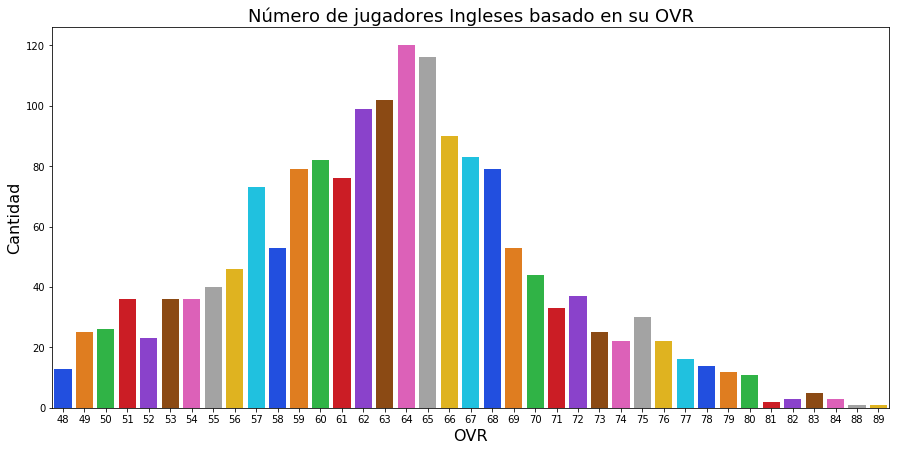

In [155]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=england, palette='bright')
ax.set_title(label='Número de jugadores Ingleses basado en su OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)

plt.show()

# España
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Spain.svg/1125px-Flag_of_Spain.svg.png" width="300" height="200" />

In [142]:
spain = country('Spain')
r,c = spain.shape
print('Número de jugadores con Nacionalidad Española ',r)

Número de jugadores con Nacionalidad Española  1035


In [143]:
spain.head()

short_name  overall  potential player_positions  age  value_eur
14           De Gea       89         90               GK   28   56000000
18     Sergio Ramos       89         89               CB   33   31500000
21  Sergio Busquets       89         89          CDM, CM   30   55000000
29            Piqué       88         88               CB   32   38000000
33      David Silva       88         88          CAM, CM   33   36000000

In [144]:
spainvalue = 0
for i in range(0, len(spain)):
    spainvalue+=spain.iloc[i]['value_eur']
    
spainvalue = spainvalue/1000000

print('Valor actual de jugadores Españoles combinados ',spainvalue, ' millones de Euros')

Valor actual de jugadores Españoles combinados  4735.49  millones de Euros


In [145]:
avg_age = spain["age"].mean()
avg_age = round(avg_age,1)
print('Promedio de edad jugadores Españoles ',avg_age, ' años')

Promedio de edad jugadores Españoles  25.6  años


In [146]:
avg_ovr = spain["overall"].mean()
avg_ovr = int(avg_ovr)
print('OVR promedio de jugadores Españoles ',avg_ovr)

OVR promedio de jugadores Españoles  69


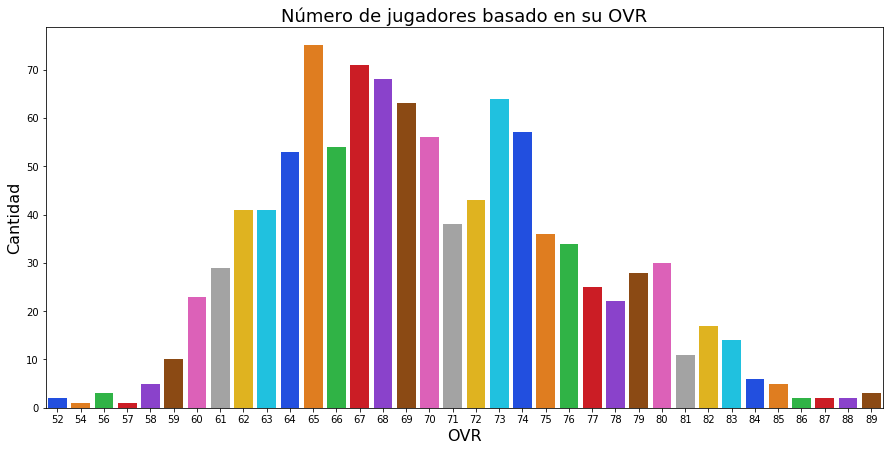

In [147]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=spain, palette='bright')
ax.set_title(label='Número de jugadores Españoles basado en su OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)

plt.show()

# Brasil
 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Flag_of_Brazil.svg/1080px-Flag_of_Brazil.svg.png" width="300" height="200" />

In [148]:
brazil = country('Brazil')
r,c = brazil.shape
print('Número de jugadores con Nacionalidad ',r)

Número de jugadores con Nacionalidad  824


In [149]:
brazil.head()

short_name  overall  potential player_positions  age  value_eur
2     Neymar Jr       92         92          LW, CAM   27  105500000
13      Alisson       89         91               GK   26   58000000
25      Ederson       88         91               GK   25   54500000
42     Casemiro       87         89              CDM   27   53500000
44  Fernandinho       87         87              CDM   34   19500000

In [150]:
brazilvalue = 0
for i in range(0, len(brazil)):
    brazilvalue+=brazil.iloc[i]['value_eur']
    
brazilvalue = brazilvalue/1000000

print('CValor actual de jugadores Brasileros combinados ',brazilvalue, ' millones de Euros')

CValor actual de jugadores Brasileros combinados  3728.055  millones de Euros


In [151]:
avg_age = brazil["age"].mean()
avg_age = round(avg_age,1)
print('Promedio de edad jugadores Brasileros ',avg_age, ' años')

Promedio de edad jugadores Brasileros  28.0  años


In [153]:
avg_ovr = brazil["overall"].mean()
avg_ovr = int(avg_ovr)
print('OVR promedio de jugadores OVR ',avg_ovr)

OVR promedio de jugadores OVR  71


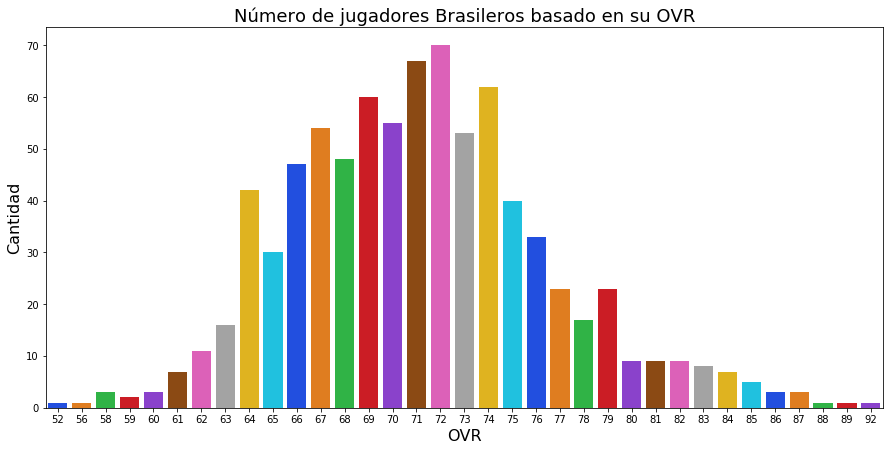

In [154]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=brazil, palette='bright')
ax.set_title(label='Número de jugadores Brasileros basado en su OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)

plt.show()

# Argentina
 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_Argentina.svg/1200px-Flag_of_Argentina.svg.png" width="300" height="200" />

In [157]:
argentina = country('Argentina')
r,c = argentina.shape
print('Número de jugadores con Nacionalidad Argentina ',r)

Número de jugadores con Nacionalidad Argentina  886


In [158]:
argentina.head()

short_name  overall  potential player_positions  age  value_eur
0      L. Messi       94         94       RW, CF, ST   32   95500000
17    S. Agüero       89         89               ST   31   60000000
23    P. Dybala       88         92          CAM, RW   25   76500000
66  A. Di María       86         86           RW, LW   31   39000000
93    M. Icardi       85         86               ST   26   46000000

In [159]:
argentinavalue = 0
for i in range(0, len(argentina)):
    argentinavalue+=argentina.iloc[i]['value_eur']
    
argentinavalue = argentinavalue/1000000

print('Valor actual de jugadores Argentinos combinados ',argentinavalue, ' millones de Euros')

Valor actual de jugadores Argentinos combinados  3026.5  millones de Euros


In [160]:
avg_age = argentina["age"].mean()
avg_age = round(avg_age,1)
print('Promedio de edad jugadores Argentinos ',avg_age, ' años')

Promedio de edad jugadores Argentinos  26.4  años


In [161]:
avg_ovr = argentina["overall"].mean()
avg_ovr = int(avg_ovr)
print('OVR promedio de jugadores Argentinos ',avg_ovr)

OVR promedio de jugadores Argentinos  69


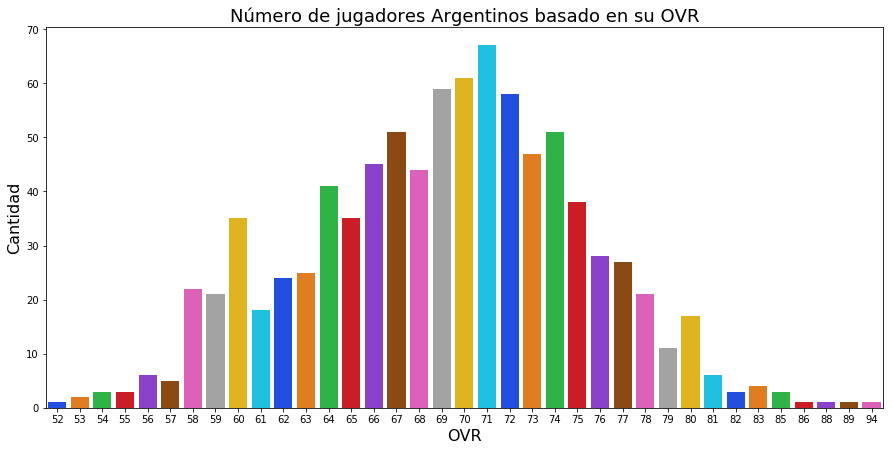

In [162]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=argentina, palette='bright')
ax.set_title(label='Número de jugadores Argentinos basado en su OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)

plt.show()

# Colombia
 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Flag_of_Colombia.svg/1200px-Flag_of_Colombia.svg.png" width="300" height="200" />

In [163]:
colombia = country('Colombia')
r,c = colombia.shape
print('Número de jugadores con Nacionalidad Colombiana ',r)

Número de jugadores con Nacionalidad Colombiana  591


In [164]:
colombia.head()

short_name  overall  potential player_positions  age  value_eur
106  J. Rodríguez       85         85      CAM, CM, RM   27   40500000
177    D. Sánchez       83         87               CB   23   30500000
207        Falcao       83         83               ST   33   16500000
225   J. Cuadrado       83         83           RM, RW   31   22500000
322     D. Zapata       82         82               ST   28   23000000

In [165]:
colombiavalue = 0
for i in range(0, len(colombia)):
    colombiavalue+=england.iloc[i]['value_eur']
    
colombiavalue = colombiavalue/1000000

print('Valor actual de jugadores Colombianos combinados ',colombiavalue, ' millones de Euros')

Valor actual de jugadores Colombianos combinados  2358.28  millones de Euros


In [166]:
avg_age = colombia["age"].mean()
avg_age = round(avg_age,1)
print('Promedio de edad jugadores Colombianos ',avg_age, ' años')

Promedio de edad jugadores Colombianos  25.5  años


In [167]:
avg_ovr = colombia["overall"].mean()
avg_ovr = int(avg_ovr)
print('OVR promedio de jugadores Colombianos ',avg_ovr)

OVR promedio de jugadores Colombianos  65


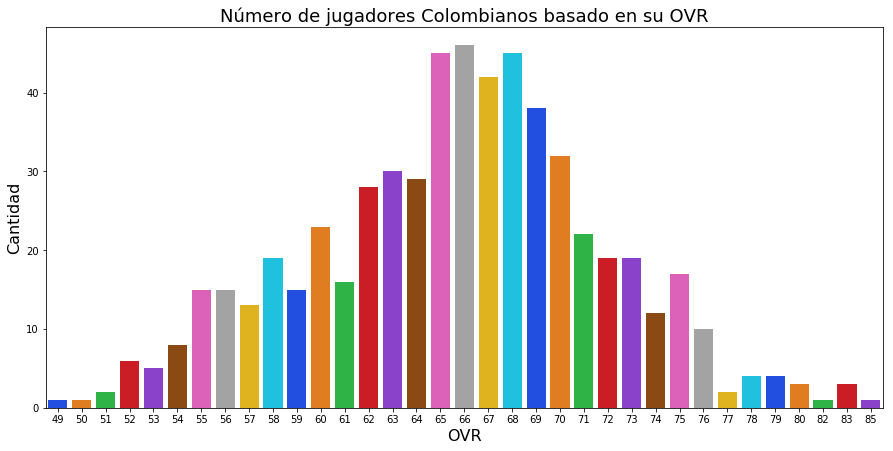

In [168]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=colombia, palette='bright')
ax.set_title(label='Número de jugadores Colombianos basado en su OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Cantidad', fontsize=16)

plt.show()